# Comparative Analysis
In this notebook, we compare Window with different parameter settings.

In [1]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import numpy as np

import pandas as pd

pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import Orange
import sys

sys.path.append("../../")

Let's choose a score for evaluation (F1 or Covering).

In [3]:
eval_score = "covering_score"

Let's load the scores from the different methods.

In [4]:
cost = "l2"
thresholds = np.round(np.arange(.05, 1., .05), 2)

methods = list()

for t in thresholds:
    candidate_name = f"{cost}-cost-{t}-threshold"
    methods.append((candidate_name, f"{candidate_name}.csv"))

for idx, (name, file_name) in enumerate(methods):
    methods[idx] = name, pd.read_csv(f"../../experiments/window_cost_threshold/{file_name}")

df_scores = pd.DataFrame()

for name, df in methods:
    df_scores["dataset"] = df.dataset
    df_scores[name] = df[eval_score]

df_scores

,dataset,l2-cost-0.05-threshold,l2-cost-0.1-threshold,l2-cost-0.15-threshold,l2-cost-0.2-threshold,l2-cost-0.25-threshold,l2-cost-0.3-threshold,l2-cost-0.35-threshold,l2-cost-0.4-threshold,l2-cost-0.45-threshold,l2-cost-0.5-threshold,l2-cost-0.55-threshold,l2-cost-0.6-threshold,l2-cost-0.65-threshold,l2-cost-0.7-threshold,l2-cost-0.75-threshold,l2-cost-0.8-threshold,l2-cost-0.85-threshold,l2-cost-0.9-threshold,l2-cost-0.95-threshold
0,DodgerLoopDay,0.052,0.039,0.038,0.061,0.050,0.050,0.065,0.064,0.064,0.063,0.063,0.063,0.062,0.062,0.061,0.061,0.060,0.060,0.060
1,EEGRat,0.170,0.350,0.566,0.578,0.592,0.620,0.641,0.641,0.641,0.636,0.634,0.609,0.704,0.727,0.728,0.728,0.729,0.729,0.730
2,EEGRat2,0.248,0.496,0.534,0.533,0.592,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500
3,FaceFour,0.523,0.529,0.505,0.504,0.504,0.530,0.281,0.281,0.281,0.281,0.281,0.281,0.281,0.281,0.281,0.281,0.281,0.281,0.281
4,GrandMalSeizures2,0.012,0.011,0.011,0.011,0.011,0.012,0.012,0.012,0.012,0.012,0.012,0.011,0.011,0.011,0.011,0.012,0.011,0.011,0.011
5,GreatBarbet1,0.853,0.683,0.683,0.712,0.355,0.355,0.355,0.355,0.355,0.355,0.355,0.355,0.355,0.355,0.355,0.355,0.355,0.355,0.355
6,Herring,0.024,0.031,0.051,0.100,0.180,0.283,0.401,0.401,0.445,0.554,0.554,0.554,0.554,1.000,1.000,1.000,1.000,1.000,1.000
7,InlineSkate,0.045,0.054,0.057,0.058,0.058,0.058,0.067,0.071,0.081,0.099,0.114,0.115,0.114,0.140,0.141,0.166,0.166,0.209,0.220
8,InsectEPG1,0.653,0.653,0.653,0.653,0.653,0.653,0.653,0.653,0.653,0.653,0.653,0.653,0.653,0.653,0.653,0.653,0.653,0.653,0.653
9,MelbournePedestrian,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149


Let's calculate the mean/std score.

In [5]:
df_scores.mean(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_3295/3088260556.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.mean(axis=0).round(3)


l2-cost-0.05-threshold    0.214
l2-cost-0.1-threshold     0.257
l2-cost-0.15-threshold    0.287
l2-cost-0.2-threshold     0.324
l2-cost-0.25-threshold    0.333
l2-cost-0.3-threshold     0.360
l2-cost-0.35-threshold    0.332
l2-cost-0.4-threshold     0.336
l2-cost-0.45-threshold    0.343
l2-cost-0.5-threshold     0.345
l2-cost-0.55-threshold    0.352
l2-cost-0.6-threshold     0.341
l2-cost-0.65-threshold    0.346
l2-cost-0.7-threshold     0.362
l2-cost-0.75-threshold    0.363
l2-cost-0.8-threshold     0.365
l2-cost-0.85-threshold    0.365
l2-cost-0.9-threshold     0.367
l2-cost-0.95-threshold    0.366
dtype: float64

In [6]:
df_scores.std(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_3295/2527189798.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.std(axis=0).round(3)


l2-cost-0.05-threshold    0.220
l2-cost-0.1-threshold     0.217
l2-cost-0.15-threshold    0.232
l2-cost-0.2-threshold     0.238
l2-cost-0.25-threshold    0.235
l2-cost-0.3-threshold     0.266
l2-cost-0.35-threshold    0.215
l2-cost-0.4-threshold     0.214
l2-cost-0.45-threshold    0.215
l2-cost-0.5-threshold     0.218
l2-cost-0.55-threshold    0.224
l2-cost-0.6-threshold     0.210
l2-cost-0.65-threshold    0.217
l2-cost-0.7-threshold     0.258
l2-cost-0.75-threshold    0.259
l2-cost-0.8-threshold     0.258
l2-cost-0.85-threshold    0.258
l2-cost-0.9-threshold     0.257
l2-cost-0.95-threshold    0.257
dtype: float64

Let's compute the wins per method.

In [7]:
ranks = df_scores.rank(1, method='min', ascending=False)
means = np.array(ranks.mean(axis=0))

In [8]:
for mean, name in zip(means, df_scores.columns[1:]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 5)}")

l2-cost-0.05-threshold:wins=10 rank=9.47619
l2-cost-0.1-threshold:wins=8 rank=9.61905
l2-cost-0.15-threshold:wins=9 rank=7.85714
l2-cost-0.2-threshold:wins=9 rank=6.38095
l2-cost-0.25-threshold:wins=10 rank=5.85714
l2-cost-0.3-threshold:wins=13 rank=4.7619
l2-cost-0.35-threshold:wins=11 rank=3.7619
l2-cost-0.4-threshold:wins=10 rank=3.61905
l2-cost-0.45-threshold:wins=11 rank=3.28571
l2-cost-0.5-threshold:wins=10 rank=3.47619
l2-cost-0.55-threshold:wins=11 rank=3.28571
l2-cost-0.6-threshold:wins=9 rank=4.09524
l2-cost-0.65-threshold:wins=9 rank=4.0
l2-cost-0.7-threshold:wins=9 rank=4.61905
l2-cost-0.75-threshold:wins=9 rank=4.33333
l2-cost-0.8-threshold:wins=10 rank=3.80952
l2-cost-0.85-threshold:wins=9 rank=4.2381
l2-cost-0.9-threshold:wins=9 rank=4.38095
l2-cost-0.95-threshold:wins=11 rank=4.42857


Let's plot and output the ranks.

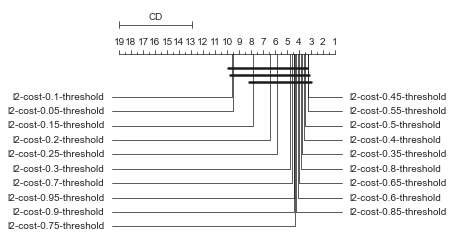

In [9]:
cd = Orange.evaluation.scoring.compute_CD(means, df_scores.shape[0])
Orange.evaluation.scoring.graph_ranks(means, ranks.columns, cd=cd, reverse=True, width=5,
                                      filename=f"../../figures/cd_ablation_window_{cost}_threshold.pdf")

Let's compute pairwise wins/losses.

In [10]:
selection = "l2-cost-0.45-threshold"

for rival in df_scores.columns[1:]:
    if rival == selection: continue

    df_pair = df_scores[[selection, rival]]
    pair_ranks = df_pair.rank(1, method='min', ascending=False)

    wins = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks[selection] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 1)].shape[0]

    assert wins + losses + ties == pair_ranks.shape[0]

    print(f"{selection} vs {rival}: (wins/ties/losses): {wins}/{ties}/{losses}")

l2-cost-0.45-threshold vs l2-cost-0.05-threshold: (wins/ties/losses): 10/9/2
l2-cost-0.45-threshold vs l2-cost-0.1-threshold: (wins/ties/losses): 11/8/2
l2-cost-0.45-threshold vs l2-cost-0.15-threshold: (wins/ties/losses): 9/9/3
l2-cost-0.45-threshold vs l2-cost-0.2-threshold: (wins/ties/losses): 8/9/4
l2-cost-0.45-threshold vs l2-cost-0.25-threshold: (wins/ties/losses): 7/10/4
l2-cost-0.45-threshold vs l2-cost-0.3-threshold: (wins/ties/losses): 6/12/3
l2-cost-0.45-threshold vs l2-cost-0.35-threshold: (wins/ties/losses): 4/16/1
l2-cost-0.45-threshold vs l2-cost-0.4-threshold: (wins/ties/losses): 4/17/0
l2-cost-0.45-threshold vs l2-cost-0.5-threshold: (wins/ties/losses): 3/15/3
l2-cost-0.45-threshold vs l2-cost-0.55-threshold: (wins/ties/losses): 3/15/3
l2-cost-0.45-threshold vs l2-cost-0.6-threshold: (wins/ties/losses): 5/14/2
l2-cost-0.45-threshold vs l2-cost-0.65-threshold: (wins/ties/losses): 4/14/3
l2-cost-0.45-threshold vs l2-cost-0.7-threshold: (wins/ties/losses): 5/13/3
l2-cost-

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_3295/2574710515.py:8: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)
/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_3295/2574710515.py:11: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)


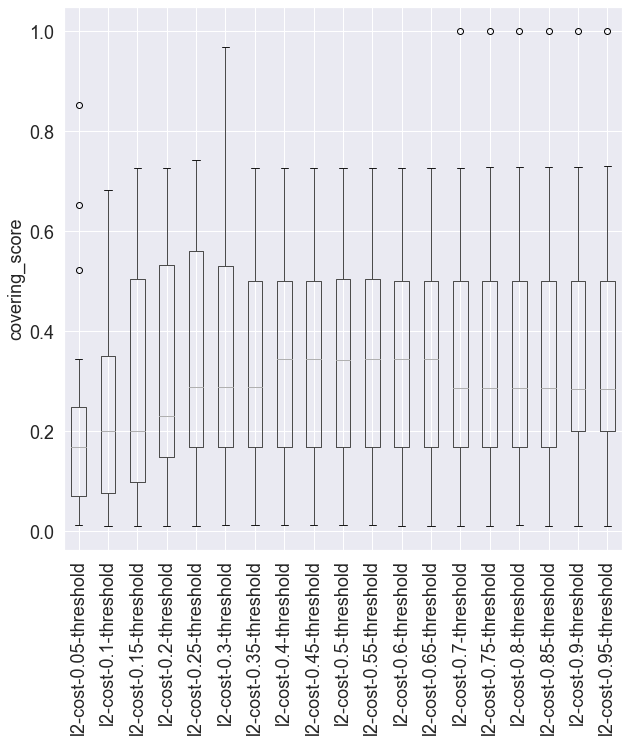

In [11]:
fontsize = 18
_, ax = plt.subplots(figsize=(10, 10))

df_scores.boxplot(ax=ax, rot=90)
ax.set_ylabel(eval_score, fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

plt.savefig(f"../../figures/bp_ablation_window_{cost}_threshold.pdf", bbox_inches="tight") 